# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/home/dell/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


# Importing the dataset

In [8]:
df = pd.read_csv('Position_Salaries.csv')
df
X = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

In [9]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [10]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [11]:
y = y.reshape(len(y),1)
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

# Applying feature scaling

In [13]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X = sc_x.fit_transform(X)

sc_y = StandardScaler()
y = sc_y.fit_transform(y)

In [14]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [15]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

# Training the SVR model on the whole dataset

In [16]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X,y)

/home/dell/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

# Predicting a new result

In [17]:
regressor.predict(sc_x.transform([[6.5]]))

array([-0.27861589])

In [18]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])))

array([170370.0204065])

# Visualising the SVR result

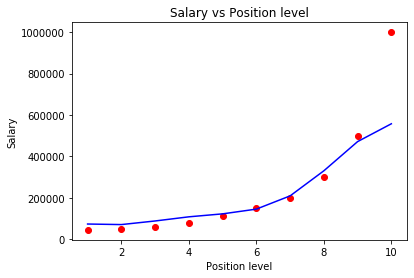

In [35]:
plt.scatter(sc_x.inverse_transform(X),sc_y.inverse_transform(y),color='red')
plt.plot(sc_x.inverse_transform(X),sc_y.inverse_transform(regressor.predict(X)),color='blue')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.title('Salary vs Position level')
plt.show()

# Visualising the SVR result for higher resolution

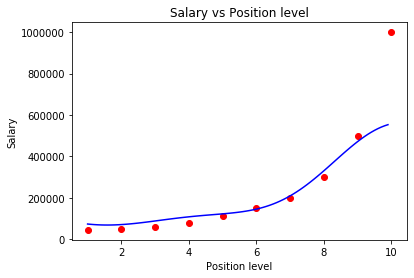

In [43]:
X_grid = np.arange(min(sc_x.inverse_transform(X)),max(sc_x.inverse_transform(X)),0.1)
X_grid = X_grid.reshape(len(X_grid),1)

plt.scatter(sc_x.inverse_transform(X),sc_y.inverse_transform(y),color='red')
plt.plot(X_grid,sc_y.inverse_transform(regressor.predict(sc_x.transform(X_grid))),color='blue')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.title('Salary vs Position level')
plt.show()